### 주성분분석(PCA, Principal Compoinent Analysis) : 차원축소
- 주성분분석(주요 구성요소, 특성), PCA라고도 불림
- 대표적인 차원축소 모델
- 지도/ 비지도 모두 사용가능
- 특성이 많으면 훈련모델의 성능을 높지만, 과대적합 될 가능성이 커짐
- 이때, 차원축소를 이용하면 성능을 유지하면서, 속도를 높일 수 있음
- 
- <차원축소>
- 데이터를 가장 잘 나타내는 일부 특성을 선택
- 데이터 크기(특성)을 줄이면서 학습모델의 성능으르 향상시키는 방법
- 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함
- 
- <장점>
- 대량의 데이터를 이용하여 모델 훈련시에 시간이 오래 걸리는 경우 적용해 볼수 있음
- 훈련시간 개선 및 성능 유지 또는 향상 가능

#### PCA클래스(모델)

#### 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np

fruits = np.load('./data/09_fruits_300.npy')
print(fruits.shape)
fruits # 3차원
# 첫번째 축 : 300개 행
# 두번째 축 : 100개 열
# 세번째 축 : 100개 깊이 (실제 데이터가 들어있는 곳)

# 300행 10000열로 변환
fruits_2d = fruits.reshape(-1, 100 * 100)
print(fruits_2d) # 2차원
df = pd.DataFrame(fruits_2d)
df

(300, 100, 100)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스(모델) 생성하기
# n_components : 주성분의 갯수를 지정 (찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정해 주어야 함
pca = PCA(n_components = 50)

# 훈련모델 생성하기
pca.fit(fruits_2d)

PCA(n_components=50)

In [10]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [11]:
import matplotlib.pyplot as plt

asdfads

NameError: name 'asdfads' is not defined

In [27]:
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')

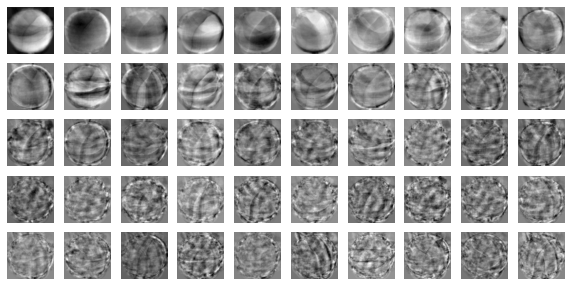

In [28]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
print(fruits_2d.shape)

(300, 10000)


#### 차원축소하기

In [16]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


#### 원본 데이터 재구성

In [17]:
# 50개를 10000개로 확대
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)

[[1.04568145 1.05522126 1.0651     ... 1.         1.         1.        ]
 [1.02848051 0.99246625 1.02586093 ... 1.         1.         1.        ]
 [1.03747604 1.054987   1.05984774 ... 1.         1.         1.        ]
 ...
 [1.01617371 0.91377573 0.97644192 ... 1.         1.         1.        ]
 [0.50538238 0.83937748 0.58459965 ... 1.         1.         1.        ]
 [1.05416427 0.95873432 1.0375883  ... 1.         1.         1.        ]]


In [19]:
# 2d -> 3d로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


In [29]:
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start : start + 10])
    print('w\')

SyntaxError: EOL while scanning string literal (1551402635.py, line 3)

#### KMeans 모델에 차원축소 데이터 적용하기


In [21]:
from sklearn.cluster import KMeans

# n_clusters : 클러스터 갯수
km = KMeans(n_clusters = 3, random_state = 42)

# 훈련모델 생성핳기
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [22]:
print(np.unique(km.labels_, return_counts= True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('w\')

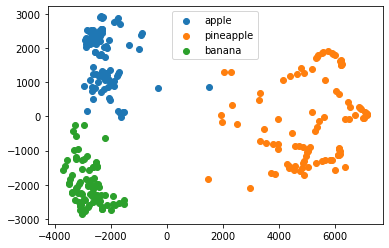

In [25]:
# 클러스터 구성 확인 > 산점도로 시각화하여 확인
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    

plt.legend(['apple','pineapple','banana'])
plt.show()

In [26]:
fruits_pca[km.labels_ == label]

array([[-2778.41779459, -1571.87380914, -1335.33773864, ...,
          -21.36595031,    46.67241437,    83.40786879],
       [-3078.27365136, -2739.27040969,  -636.18337287, ...,
         -155.98283642,   110.99875925,    -5.5342468 ],
       [-2620.61072939, -1486.87055226, -1471.33777707, ...,
          -63.47765444,    68.7010617 ,    92.99016347],
       ...,
       [-3235.21083628, -2098.59882695,   392.55849393, ...,
          157.55876144,   291.74448028,     3.33323879],
       [-2517.44162248, -1374.42391338,  -179.43475483, ...,
          283.04977309,   109.65411759,   173.9493417 ],
       [-2448.98211385, -2051.02045839,  1151.93183543, ...,
          -89.72984687,   146.99907158,  -118.39952283]])

#### 로지스틱 회귀모델 적용해보기

In [44]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

# 종속변수(traget) 생성하기
# 지도학습을 사용하는 경우 target 변수가 필요함
target = [0]*100 + [1]*100 + [2]*100

In [45]:
df = pd.DataFrame(target)
# df[target] = df
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
295,2
296,2
297,2
298,2


In [49]:
# 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6887002468109131


In [50]:
pca = PCA(n_components= 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [51]:
print(pca.n_components_)

2


In [53]:
# 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [54]:
# 교차검증으로 성능 최대화
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

0.9933333333333334
0.0618016242980957
